In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [136]:
df = pd.read_csv('insurance.csv')

In [137]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [139]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='sex', ylabel='charges'>

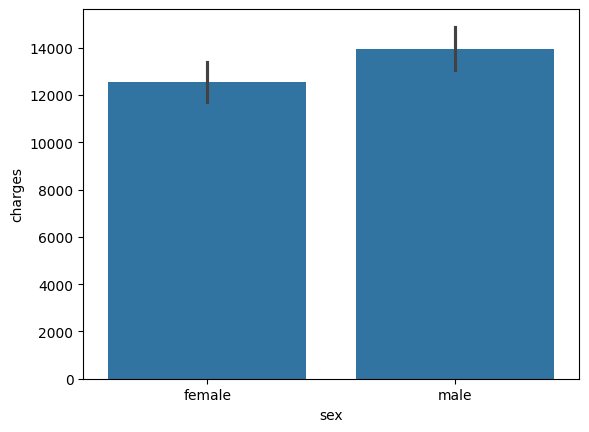

In [140]:
sns.barplot(x='sex', y='charges', data=df)

<Axes: xlabel='sex', ylabel='Count'>

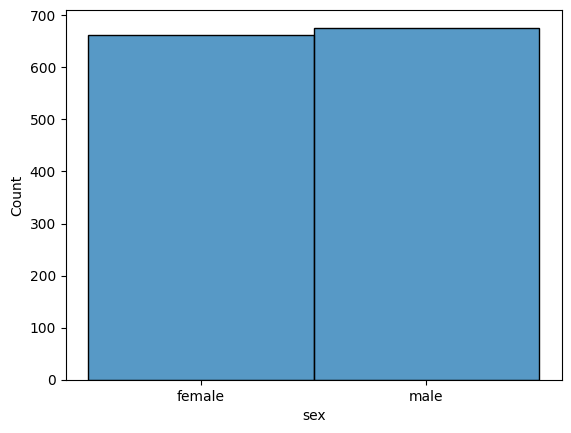

In [141]:
sns.histplot(x='sex', data=df)

<Axes: xlabel='sex', ylabel='charges'>

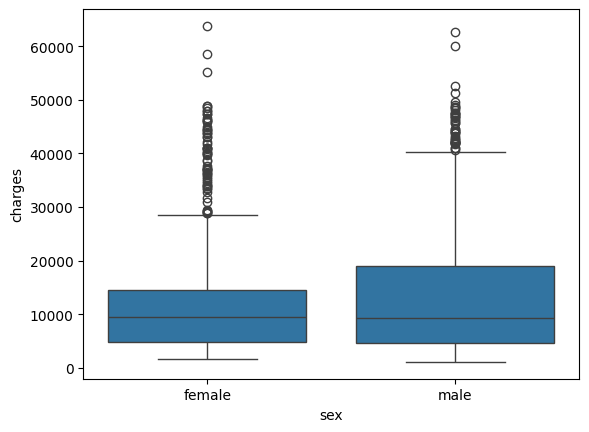

In [142]:
sns.boxplot(x='sex', y='charges', data=df)

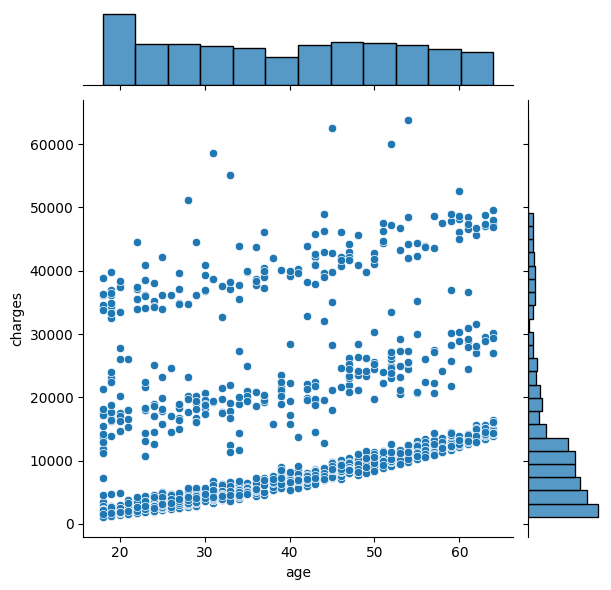

In [143]:
sns.jointplot(x='age', y='charges', data=df)

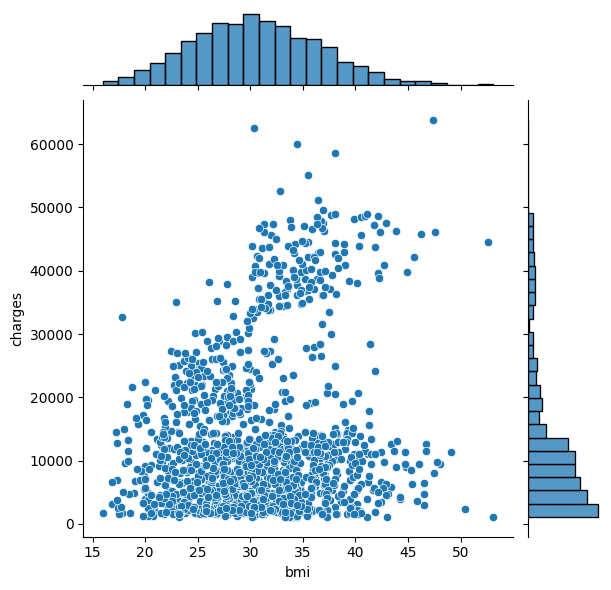

In [144]:
sns.jointplot(x='bmi', y='charges', data = df)

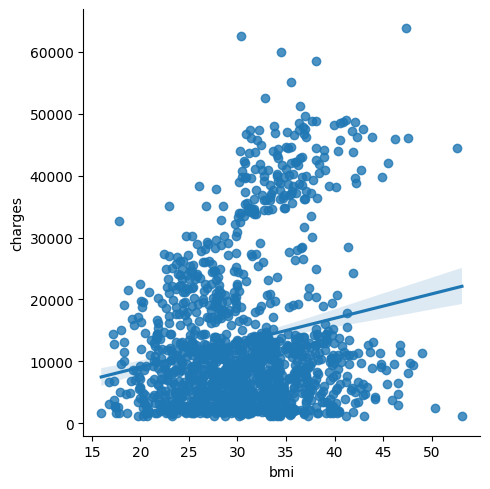

In [145]:
sns.lmplot(x='bmi', y='charges', data=df)

<Axes: xlabel='children', ylabel='charges'>

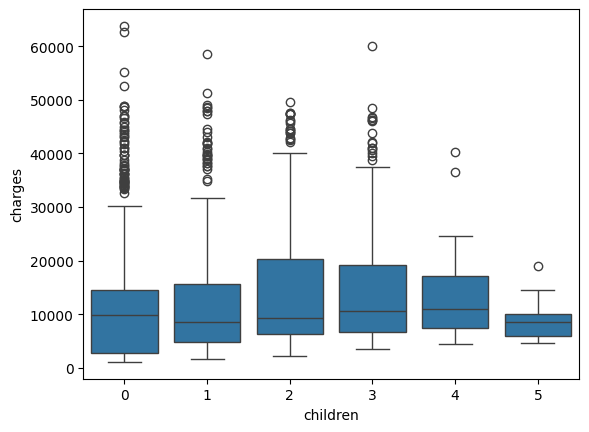

In [146]:
sns.boxplot(x='children', y='charges', data=df)

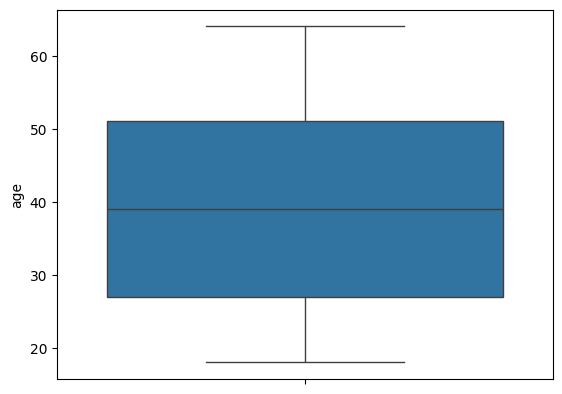

In [147]:
sns.boxplot(y='age', data=df)
plt.show()

<Axes: ylabel='bmi'>

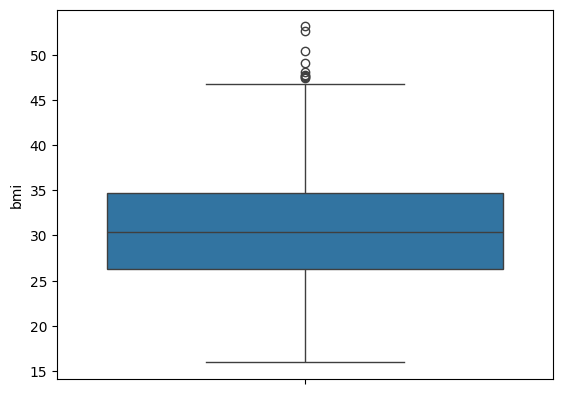

In [148]:
sns.boxplot(y='bmi', data=df)

In [149]:
def cap_data(data, percentile=95):
    # Calculating upper and lower limit of data
    lower_bound = np.quantile(data, (100- percentile)/100)
    upper_bound = np.quantile(data, percentile/100)
    # capping data within those bounds
    capped_data = np.clip(data, lower_bound, upper_bound)

    return capped_data

In [150]:
cap_df = cap_data(df['bmi'])

In [151]:
print(cap_df)

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64


In [152]:
df['bmi'] = cap_df

<Axes: ylabel='bmi'>

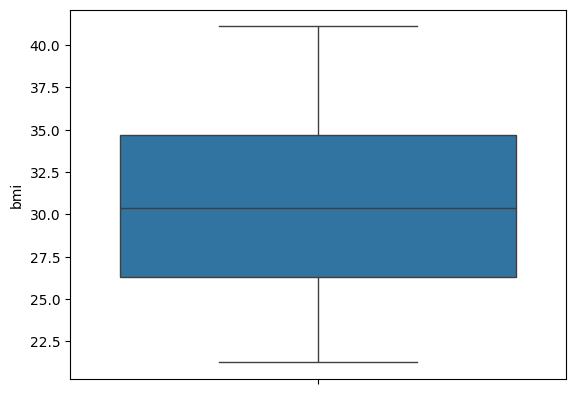

In [153]:
sns.boxplot(y='bmi', data=df)

<Axes: ylabel='charges'>

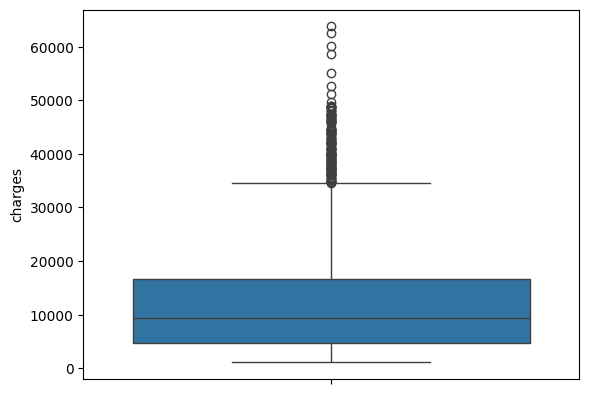

In [154]:
sns.boxplot(y='charges', data=df)

In [155]:
cap_char = cap_data(df['charges'])

In [156]:
df['charges'] = cap_char

<Axes: ylabel='charges'>

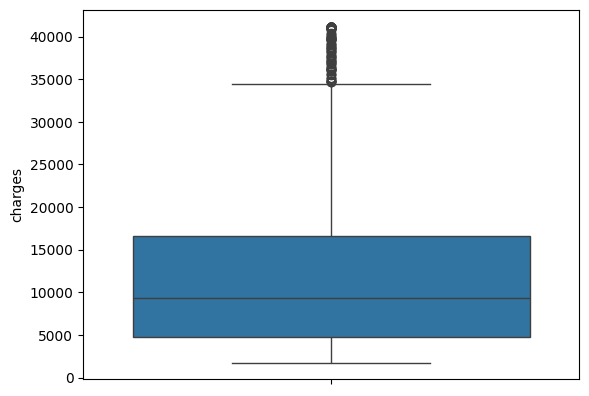

In [157]:
sns.boxplot(y='charges', data=df)

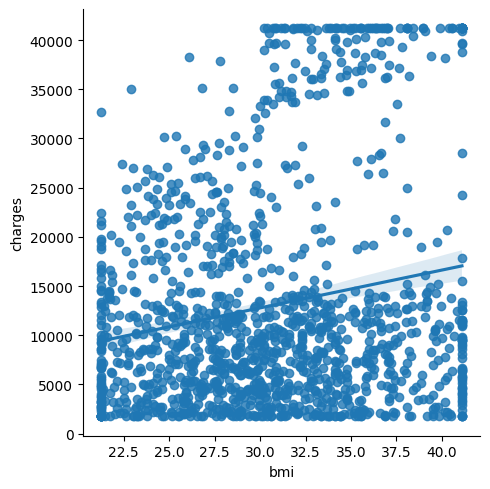

In [158]:
sns.lmplot(x='bmi', y='charges', data=df)

In [159]:
z_scores = (df['charges'] - df['charges'].mean()) / df['charges'].std()
outliers = df[z_scores > 1.8]

In [160]:
print(outliers.describe())

              age         bmi    children       charges
count  150.000000  150.000000  150.000000    150.000000
mean    39.826667   34.974373    1.126667  39095.280321
std     14.233785    3.659710    1.125045   2519.659060
min     18.000000   22.895000    0.000000  33471.971890
25%     27.000000   32.061250    0.000000  37093.003550
50%     40.500000   34.850000    1.000000  40346.332300
75%     51.750000   37.070000    2.000000  41181.827787
max     64.000000   41.106000    4.000000  41181.827787


In [161]:
df_cleaned = df[~df.index.isin(outliers.index)]


In [162]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1188 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1188 non-null   int64  
 1   sex       1188 non-null   object 
 2   bmi       1188 non-null   float64
 3   children  1188 non-null   int64  
 4   smoker    1188 non-null   object 
 5   region    1188 non-null   object 
 6   charges   1188 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 74.2+ KB


<Axes: ylabel='charges'>

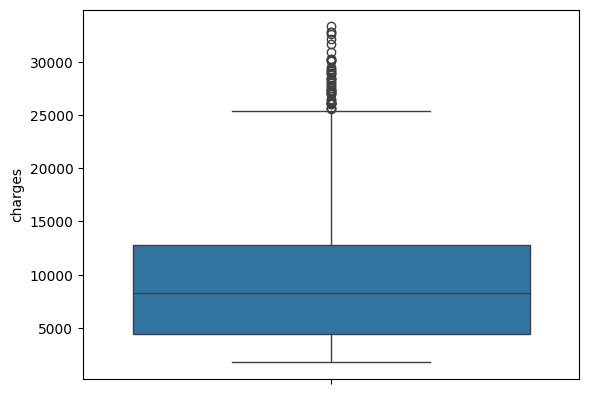

In [163]:
sns.boxplot(y='charges', data=df_cleaned)

In [164]:
df = df_cleaned

In [165]:
cap_char3 = cap_data(df['charges'])

In [166]:
df['charges'] = cap_char3

<Axes: ylabel='charges'>

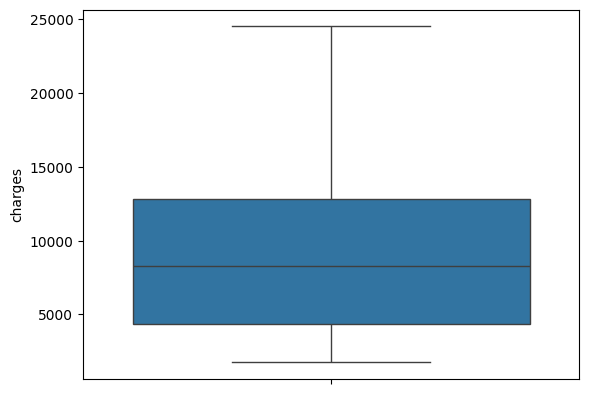

In [167]:
sns.boxplot(y='charges', data=df)

In [168]:
missing_values = df.isnull().sum()
print(missing_values)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [169]:
df['gender_int'] = df['sex'].map({'male':1, 'female':0})

In [170]:
df.head()

,age,sex,bmi,children,smoker,region,charges,gender_int
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1757.75340,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


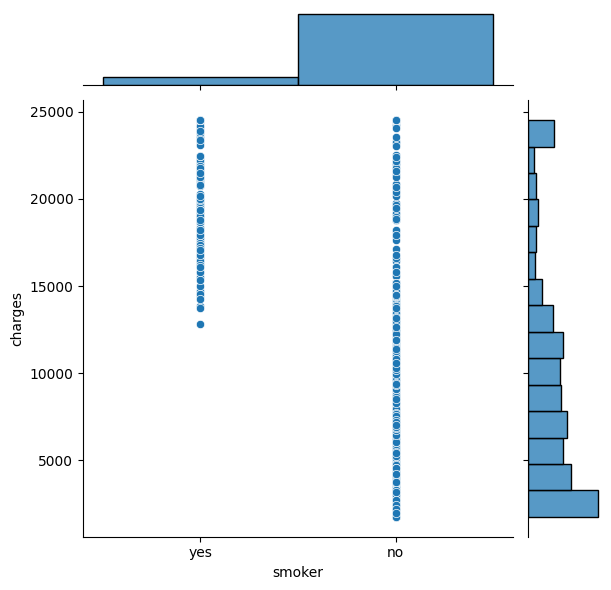

In [171]:
sns.jointplot(x='smoker', y='charges', data=df)

<Axes: xlabel='smoker', ylabel='charges'>

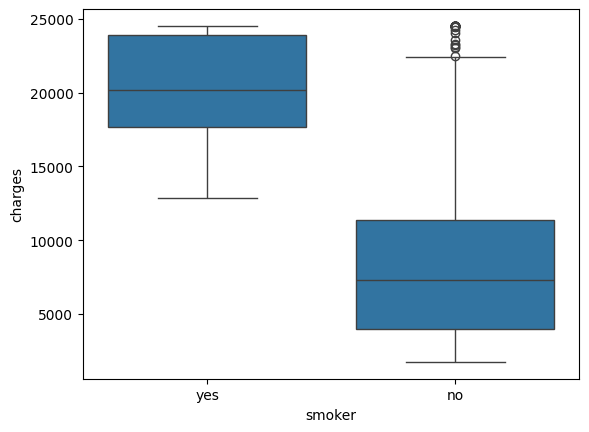

In [172]:
sns.boxplot(x='smoker', y='charges', data=df)

<Axes: xlabel='region', ylabel='charges'>

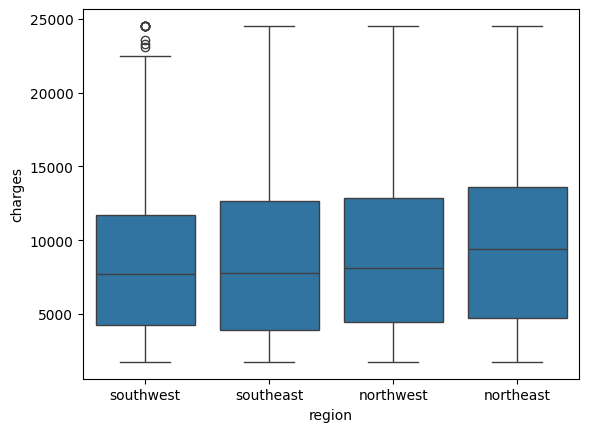

In [173]:
sns.boxplot(x='region', y='charges', data=df)

In [174]:
df['smoker_int'] = df['smoker'].map({'yes':1, 'no':0})

In [175]:
df.head()

,age,sex,bmi,children,smoker,region,charges,gender_int,smoker_int
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1757.75340,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [176]:
df.pop('sex')

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1188, dtype: object

In [177]:
df.pop('smoker')

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1188, dtype: object

In [178]:
df.pop('region')

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1188, dtype: object

In [179]:
df.head()

,age,bmi,children,charges,gender_int,smoker_int
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1757.75340,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0


In [184]:
df.head()

,age,bmi,children,charges,gender_int,smoker_int
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1757.75340,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0


In [185]:
# Linear regression

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
X = df.drop('charges', axis=1)
y = df['charges']

In [188]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state= 42)


In [189]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state= 42)


In [190]:
from sklearn.linear_model import LinearRegression

In [191]:
lm = LinearRegression()

In [192]:
lm.fit(X_train, y_train)

LinearRegression()

In [193]:
print(lm.intercept_)

-2474.927514068573


In [194]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [195]:
coeff_df

,Coefficient
age,250.753595
bmi,8.831631
children,540.684992
gender_int,-194.451328
smoker_int,12558.086952


In [196]:
predictions = lm.predict(X_val)

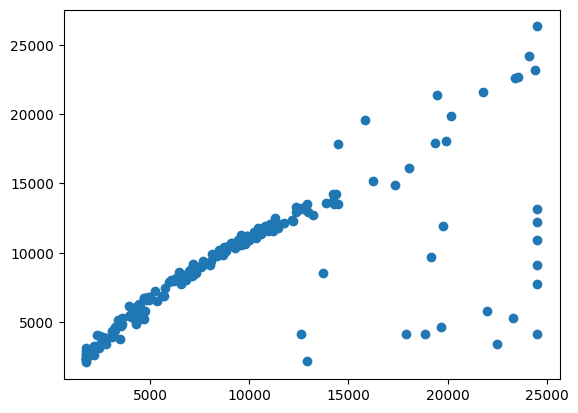

In [197]:
plt.scatter(y_val, predictions)

In [198]:
from sklearn import metrics

In [199]:
predictions.shape

(178,)

In [200]:
print('MAE:', metrics.mean_absolute_error(y_val, predictions))
print('MSE:', metrics.mean_squared_error(y_val, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, predictions)))

MAE: 2396.5202792739115
MSE: 20461829.46681303
RMSE: 4523.475374843222
